In [1]:
import tensorflow as tf

In [2]:
from tensorflow import keras 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
print(tf.__version__)

2.1.0


In [4]:
from keras.datasets import cifar10
(x_train,y_train), (x_test,y_test)= cifar10.load_data()

Using TensorFlow backend.


In [5]:
type(x_train)

numpy.ndarray

In [6]:
print('x_train:',x_train.shape)
print('y_train:',y_train.shape)
print('x_test:',x_test.shape)
print('y_test:',y_test.shape)

x_train: (50000, 32, 32, 3)
y_train: (50000, 1)
x_test: (10000, 32, 32, 3)
y_test: (10000, 1)


In [7]:
x_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

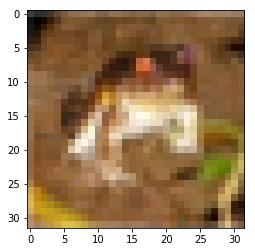

In [8]:
plt.imshow(x_train[0])

In [9]:
y_train[0]

array([6], dtype=uint8)

In [10]:
from keras.utils import to_categorical
y_train_one_hot= to_categorical(y_train)
y_test_one_hot= to_categorical(y_test)

print(y_train_one_hot)


[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]


In [11]:
y_train_one_hot[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

In [12]:
x_train= x_train/255
x_test= x_test/255

In [13]:
x_train[0].shape

(32, 32, 3)

In [14]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.optimizers import Adam

model= Sequential()

model.add(Conv2D(32, (5,5), activation= 'relu', input_shape=x_train[0].shape))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32,(5,5), activation= 'relu'))
model.add(BatchNormalization())        
model.add(MaxPooling2D(pool_size=(2,2)))
          
model.add(Flatten())
          
model.add(Dense(1000, activation='relu'))
model.add(Dense(10, activation='softmax')) 

In [15]:
model.compile(loss= 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [16]:
hist= model.fit(x_train,y_train_one_hot,batch_size= 256, epochs=10,validation_split= 0.2)

Train on 40000 samples, validate on 10000 samples
Epoch 1/10
40000/40000 [==============================] - 77s 2ms/sample - loss: 1.4529 - accuracy: 0.4979 - val_loss: 3.0724 - val_accuracy: 0.1953
Epoch 2/10
40000/40000 [==============================] - 75s 2ms/sample - loss: 0.9987 - accuracy: 0.6500 - val_loss: 2.7201 - val_accuracy: 0.3218
Epoch 3/10
40000/40000 [==============================] - 66s 2ms/sample - loss: 0.7772 - accuracy: 0.7305 - val_loss: 1.7988 - val_accuracy: 0.4442
Epoch 4/10
40000/40000 [==============================] - 60s 2ms/sample - loss: 0.6011 - accuracy: 0.7927 - val_loss: 0.9611 - val_accuracy: 0.6765
Epoch 5/10
40000/40000 [==============================] - 61s 2ms/sample - loss: 0.4434 - accuracy: 0.8506 - val_loss: 1.1276 - val_accuracy: 0.6481
Epoch 6/10
40000/40000 [==============================] - 64s 2ms/sample - loss: 0.3077 - accuracy: 0.8996 - val_loss: 1.1474 - val_accuracy: 0.6643
Epoch 7/10
40000/40000 [==============================] 

In [17]:
model.evaluate(x_test, y_test_one_hot)[1]

10000/10000 [==============================] - 4s 362us/sample - loss: 1.3396 - accuracy: 0.6897


0.6897

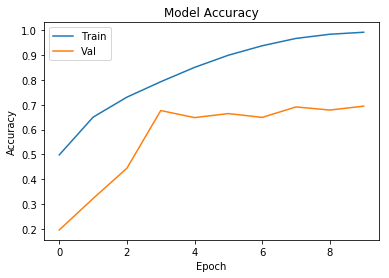

In [18]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train','Val'],loc= 'upper left')
plt.show()

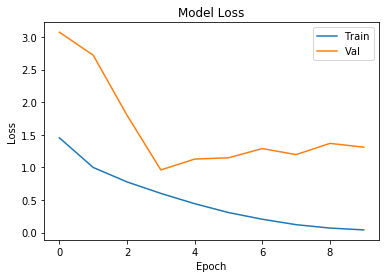

In [19]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train','Val'],loc= 'upper right')
plt.show()

In [20]:
my_image= plt.imread('cat2.jpg')

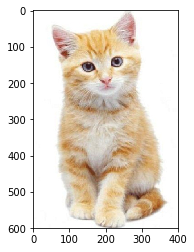

In [21]:
img= plt.imshow(my_image)

C:\Users\Acer\Anaconda3\lib\site-packages\skimage\transform\_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
C:\Users\Acer\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


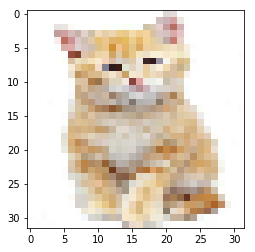

In [22]:
from skimage.transform import resize
my_image_resize= resize(my_image,(32,32,3))
img= plt.imshow(my_image_resize)


In [23]:
prob= model.predict(np.array([my_image_resize]))
prob

array([[4.1199915e-08, 7.4067570e-09, 2.2862993e-04, 7.0691967e-01,
        4.7039967e-03, 2.4019524e-01, 4.7729574e-02, 6.9580947e-06,
        2.1583046e-04, 5.8907599e-09]], dtype=float32)

In [26]:
number_to_class= ['aircraft','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
index= np.argsort(prob[0,:])
print('Most likely:',number_to_class[index[9]],'probability:',prob[0, index[9]])

Most likely: cat probability: 0.70691967
